<a href="https://colab.research.google.com/github/AshwaniKrSonu619/Pyhton-Projects-2/blob/main/LAB_05_ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


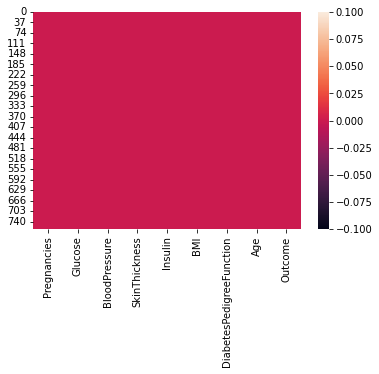

In [3]:

sns.heatmap(df.isnull())


In [4]:
x=df.values
x


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:

y=df[['Outcome']]
y


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [6]:
x1=np.delete(x,8,axis=1)
x1

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0)

# **Build Naive Bayes Classifier** 

0.7922077922077922
[[93 14]
 [18 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


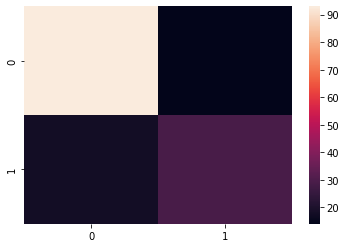

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)
print(nb_clf.score(x_test,y_test))
nb_pred=nb_clf.predict(x_test)
print(confusion_matrix(y_test,nb_pred))
sns.heatmap(confusion_matrix(y_test,nb_pred))

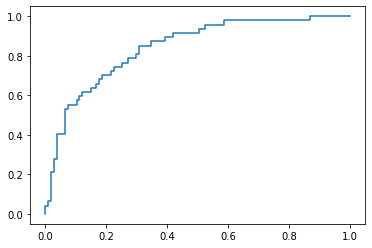

0.8413203420163055


In [9]:
nb_pred_auc=nb_clf.predict_proba(x_test)
nb_fpr,nb_tpr,threshold=roc_curve(y_test,nb_pred_auc[:,1])
plt.plot(nb_fpr,nb_tpr)
plt.show()
nb_auc=auc(nb_fpr,nb_tpr)
print(nb_auc)

# **Build SVM Classifier** 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7922077922077922
[[98  9]
 [23 24]]


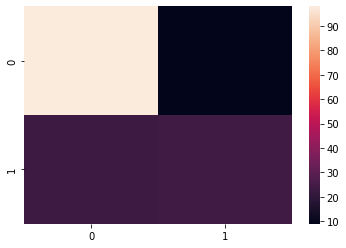

In [10]:
from sklearn.svm import SVC
sv_clf=SVC()
sv_clf.fit(x_train,y_train)
print(sv_clf.score(x_test,y_test))
y_pred=sv_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))


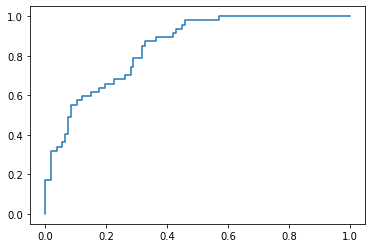

0.8456949691787632


In [11]:
sv_pred_auc=sv_clf.decision_function(x_test)
sv_fpr,sv_tpr,threshold=roc_curve(y_test,sv_pred_auc)
plt.plot(sv_fpr,sv_tpr)
plt.show()
sv_auc=auc(sv_fpr,sv_tpr)
print(sv_auc)

# **Build KNN Classifier** 

0.7532467532467533
[[87 20]
 [18 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


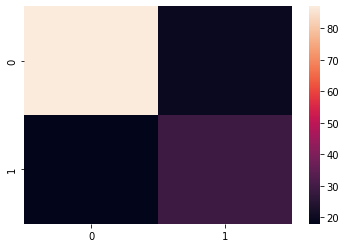

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
print(knn_clf.score(x_test,y_test))
y_pred=knn_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

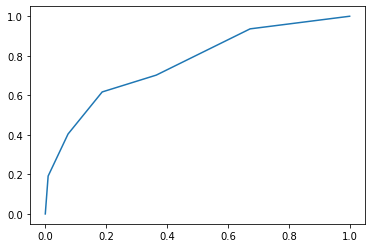

0.7640684032610857


In [14]:
knn_clf_auc=knn_clf.predict_proba(x_test)
knn_fpr,knn_tpr,threshold=roc_curve(y_test,knn_clf_auc[:,1])
plt.plot(knn_fpr,knn_tpr)
plt.show()
knn_auc=auc(knn_fpr,knn_tpr)
print(knn_auc)


# **Build Decision Tree Classifier** 

0.7532467532467533


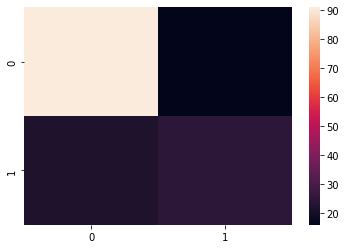

In [15]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
print(dt_clf.score(x_test,y_test))
y_pred=dt_clf.predict(x_test)
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred))


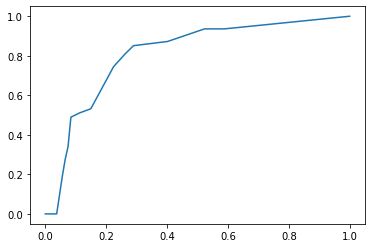

0.8101014118114933


In [19]:
dt_pred_auc=dt_clf.predict_proba(x_test)
dt_fpr,dt_tpr,threshol=roc_curve(y_test,dt_pred_auc[:,1])
plt.plot(dt_fpr,dt_tpr)
plt.show()
dt_auc=auc(dt_fpr,dt_tpr)
print(dt_auc)
      

## **Build Random Forest Classifier**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8116883116883117
[[93 14]
 [15 32]]


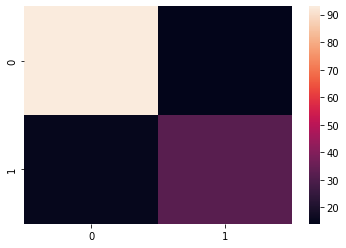

In [20]:

from sklearn import ensemble
from sklearn.metrics import confusion_matrix
rf_clf=ensemble.RandomForestClassifier()
rf_clf.fit(x_train,y_train)
print(rf_clf.score(x_test,y_test))
y_pred=rf_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

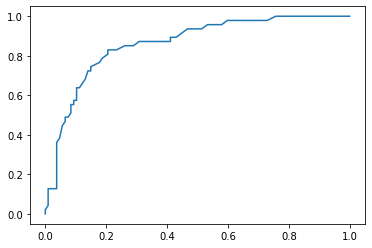

0.8607078942135613


In [21]:
rf_pred_auc=rf_clf.predict_proba(x_test)
rf_fpr,rf_tpr,threshold=roc_curve(y_test,rf_pred_auc[:,1])
plt.plot(rf_fpr,rf_tpr)
plt.show()
rf_auc=auc(rf_fpr,rf_tpr)
print(rf_auc)


## **Build Logistic Classifier**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x2=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y2=df[['Outcome']].values
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=0)
lr_clf=LogisticRegression()
lr_clf.fit(x2_train,y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# **Comparision of Different Model**

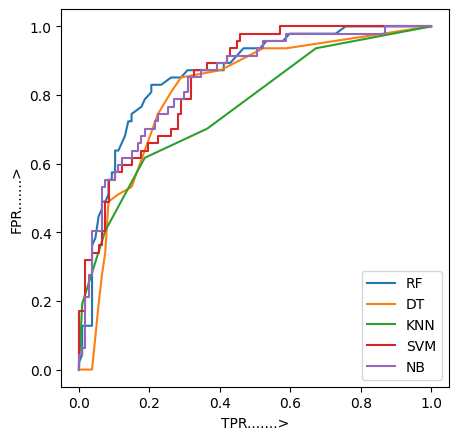

In [23]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr,rf_tpr,label="RF")
plt.plot(dt_fpr,dt_tpr,label="DT")
plt.plot(knn_fpr,knn_tpr,label="KNN")
plt.plot(sv_fpr,sv_tpr,label="SVM")
plt.plot(nb_fpr,nb_tpr,label="NB")
plt.xlabel("TPR.......>")
plt.ylabel("FPR.......>")
plt.legend()
plt.show()
